In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [4]:
original_df = pd.read_csv("LeagueDatasetTest.csv")
df = pd.read_csv("LeagueDatasetTest.csv")
del df['gc_ratio_diff']
# test_df = df(np.random.randn(100,2))
train_df, test_df = train_test_split(df, test_size = 0.2)
test_y = test_df['fpoints'].values
train_df.reset_index(drop=True)

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,fpoints
0,2.80085,4.64907,1.61282,0,0,0,0.619990,0.693392,0.405517,0,...,0.360087,0.976695,1322,1242,552.309,10,2,1,0.04,20
1,2.76626,5.21136,1.80722,0,0,0,0.623362,0.728170,0.499077,0,...,0.310036,0.980668,1574,1570,671.824,10,5,1,1.45,13
2,2.76206,5.30044,1.83768,0,0,0,0.644575,0.759229,0.521115,0,...,0.315254,0.981697,1660,1700,716.802,10,6,1,15.01,18
3,2.74948,5.11986,1.78321,0,0,0,0.594998,0.715280,0.493910,0,...,0.163830,0.981211,1317,1312,560.788,9,5,5,0.26,4
4,2.59708,4.01248,1.52422,0,0,0,0.699593,0.771096,0.389408,0,...,0.463675,0.977035,1244,1251,568.382,11,1,3,0.05,38
5,2.72422,5.07798,1.77915,0,0,0,0.586709,0.738607,0.508048,0,...,0.200980,0.978417,1136,1173,488.241,8,6,3,5.53,12
6,2.64198,4.28447,1.58122,0,0,0,0.506918,0.619029,0.385389,0,...,0.211864,0.971193,642,624,273.420,7,2,1,0.03,16
7,2.62112,3.88700,1.45599,0,0,0,0.467636,0.557484,0.306519,0,...,0.233766,0.956522,422,394,173.595,6,1,3,0.03,10
8,2.77032,5.15548,1.78702,0,0,0,0.633292,0.734924,0.496744,0,...,0.336937,0.980565,1568,1561,667.074,10,5,3,0.05,26
9,2.77825,5.32763,1.83838,0,0,0,0.666762,0.749025,0.523877,0,...,0.476052,0.985694,1942,1912,822.264,11,6,5,15.01,-1


In [5]:
train_df.describe(include='all')

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,fpoints
count,1840.000000,1840.000000,1840.000000,1840.0,1840.0,1840.0,1840.000000,1840.000000,1840.000000,1840.0,...,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,2.721523,4.801302,1.699712,0.0,0.0,0.0,0.599963,0.704388,0.454249,0.0,...,0.296395,0.977256,1265.310326,1254.284783,540.968524,9.115761,3.940217,2.986413,2.810283,16.926087
std,0.067931,0.476418,0.123892,0.0,0.0,0.0,0.074250,0.063478,0.065147,0.0,...,0.127598,0.006102,448.965827,463.722297,192.891356,1.527764,2.133834,1.412802,5.517789,7.241952
min,2.441380,3.688910,1.427480,0.0,0.0,0.0,0.412949,0.503628,0.278322,0.0,...,0.112381,0.950000,337.000000,338.000000,152.250000,6.000000,1.000000,1.000000,0.020000,-1.000000
25%,2.695255,4.486385,1.601720,0.0,0.0,0.0,0.550565,0.663513,0.401734,0.0,...,0.181185,0.973907,898.500000,881.000000,386.071250,8.000000,2.000000,2.000000,0.040000,13.000000
50%,2.746255,4.911580,1.718560,0.0,0.0,0.0,0.617943,0.709529,0.452952,0.0,...,0.299027,0.978571,1316.000000,1259.000000,558.627000,10.000000,4.000000,3.000000,0.050000,17.000000
75%,2.767230,5.204978,1.807377,0.0,0.0,0.0,0.657406,0.749817,0.510857,0.0,...,0.358886,0.981697,1649.000000,1599.000000,701.767500,10.000000,6.000000,4.000000,0.815000,22.000000
max,2.825540,5.468870,1.889450,0.0,0.0,0.0,0.720174,0.817758,0.562234,0.0,...,0.611881,0.987749,2134.000000,2233.000000,928.874000,11.000000,8.000000,5.000000,15.020000,39.000000


In [6]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
#     print(lst.reset_index())
#     print(copy_lst[average_feature])
    averages = []
#     print(copy_lst[21])
    for value in range(1, copy_lst[average_feature].max()+1):
        value_indices = np.where(copy_lst[average_feature]==value)
        total=0
        for value_index in value_indices[0]:
            total += copy_lst[average_result][value_index]
        if len(value_indices[0]) != 0:
            averages.append([value, total/len(value_indices[0])])
    return averages

fixtures_left = train_df['fixtures_left']
# print(getAverages(fixtures_left))
result = getAverages(train_df, 'number_of_teams', 'fpoints')
# result.keys()
print(result)


[[6, 11.202702702702704], [7, 12.776119402985074], [8, 15.231092436974789], [9, 16.655913978494624], [10, 18.357910906298002], [11, 20.727554179566564]]


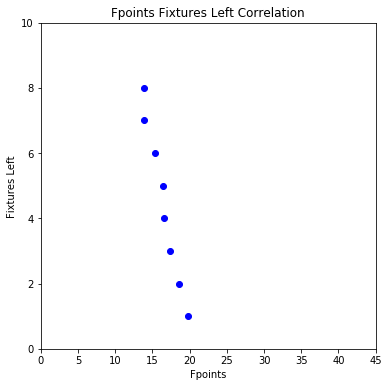

In [7]:
results = getAverages(train_df, 'fixtures_left', 'fpoints')
fpoints = []
fixtures_left = []
for item in results:
    fpoints.append(item[1])
    fixtures_left.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Fpoints Fixtures Left Correlation')
plt.scatter(fpoints, fixtures_left, color='blue', marker='o')
plt.xlabel('Fpoints')
plt.ylabel('Fixtures Left')
plt.xlim(0,45.0)
plt.ylim(0,10)
plt.show()

[[6, 11.202702702702704], [7, 12.776119402985074], [8, 15.231092436974789], [9, 16.655913978494624], [10, 18.357910906298002], [11, 20.727554179566564]]


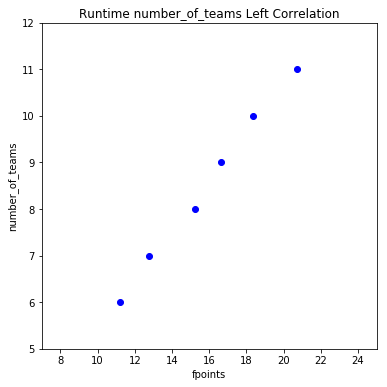

In [8]:
results = getAverages(train_df, 'number_of_teams', 'fpoints')
fpoints = []
number_of_teams = []
print(results)
for item in results:
    fpoints.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Runtime number_of_teams Left Correlation')
plt.scatter(fpoints, number_of_teams, color='blue', marker='o')
plt.xlabel('fpoints')
plt.ylabel('number_of_teams')
plt.xlim(7,25)
plt.ylim(5,12)
plt.show()

In [9]:
fixtures_left = train_df['fixtures_left']
print(np.where(fixtures_left==2))
# fixtures_left.reset_index()
print(fixtures_left.max())

(array([   0,    6,   12,   15,   18,   33,   35,   55,   63,   79,   87,
         92,   93,   95,   97,  100,  107,  108,  110,  114,  119,  121,
        124,  131,  136,  140,  147,  148,  152,  153,  168,  186,  187,
        192,  209,  210,  232,  233,  239,  269,  272,  273,  276,  279,
        291,  298,  315,  318,  320,  330,  343,  353,  359,  363,  364,
        366,  384,  386,  387,  403,  408,  411,  413,  415,  426,  439,
        444,  445,  474,  475,  476,  481,  499,  503,  511,  518,  526,
        527,  542,  548,  557,  559,  560,  561,  575,  582,  584,  591,
        608,  610,  614,  618,  619,  625,  633,  641,  649,  668,  677,
        684,  690,  693,  694,  705,  731,  734,  736,  737,  750,  754,
        756,  759,  760,  765,  771,  776,  781,  782,  794,  796,  799,
        803,  820,  829,  831,  834,  838,  843,  850,  853,  855,  857,
        862,  870,  887,  892,  895,  915,  921,  922,  927,  928,  929,
        941,  955,  960,  961,  962,  970,  977,  

In [10]:
# plt.figure(figsize=(50,50))
# cor = train_df.corr()
# print(train_df.corr())
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

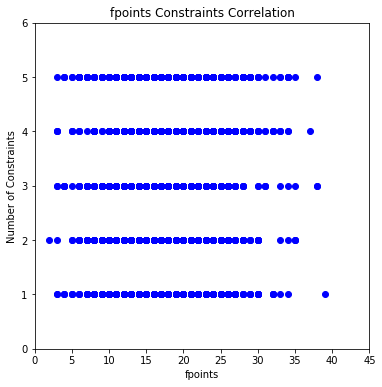

In [11]:
fpoints = train_df['fpoints']
number_of_constraints = train_df['number_of_constraints']

fig = plt.figure(figsize=(6,6))
plt.title('fpoints Constraints Correlation')
plt.scatter(fpoints, number_of_constraints, color='blue', marker='o')
plt.xlabel('fpoints')
plt.ylabel('Number of Constraints')
plt.xlim(0,45.0)
plt.ylim(0,6)
plt.show()

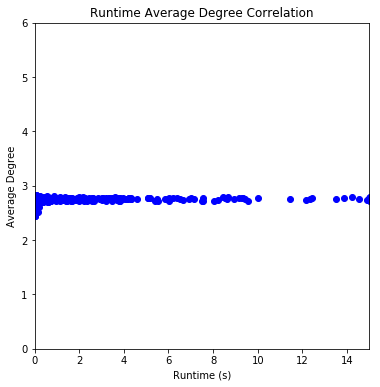

In [12]:
runtime = train_df['runtime']
c_avg_deg_cons = train_df['c_avg_deg_cons']

fig = plt.figure(figsize=(6,6))
plt.title('Runtime Average Degree Correlation')
plt.scatter(runtime, c_avg_deg_cons, color='blue', marker='o')
plt.xlabel('Runtime (s)')
plt.ylabel('Average Degree')
plt.xlim(0,15.0)
plt.ylim(0,6)
plt.show()

In [13]:
# list(df.columns)
# plt.figure(figsize=(12,10))
# cor = train_df.corr()
# print(train_df.corr())
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [14]:
train_df = train_df.take(np.random.permutation(len(train_df)))

In [15]:
train_y = train_df['fpoints'].values
league_numeric_features = ['c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

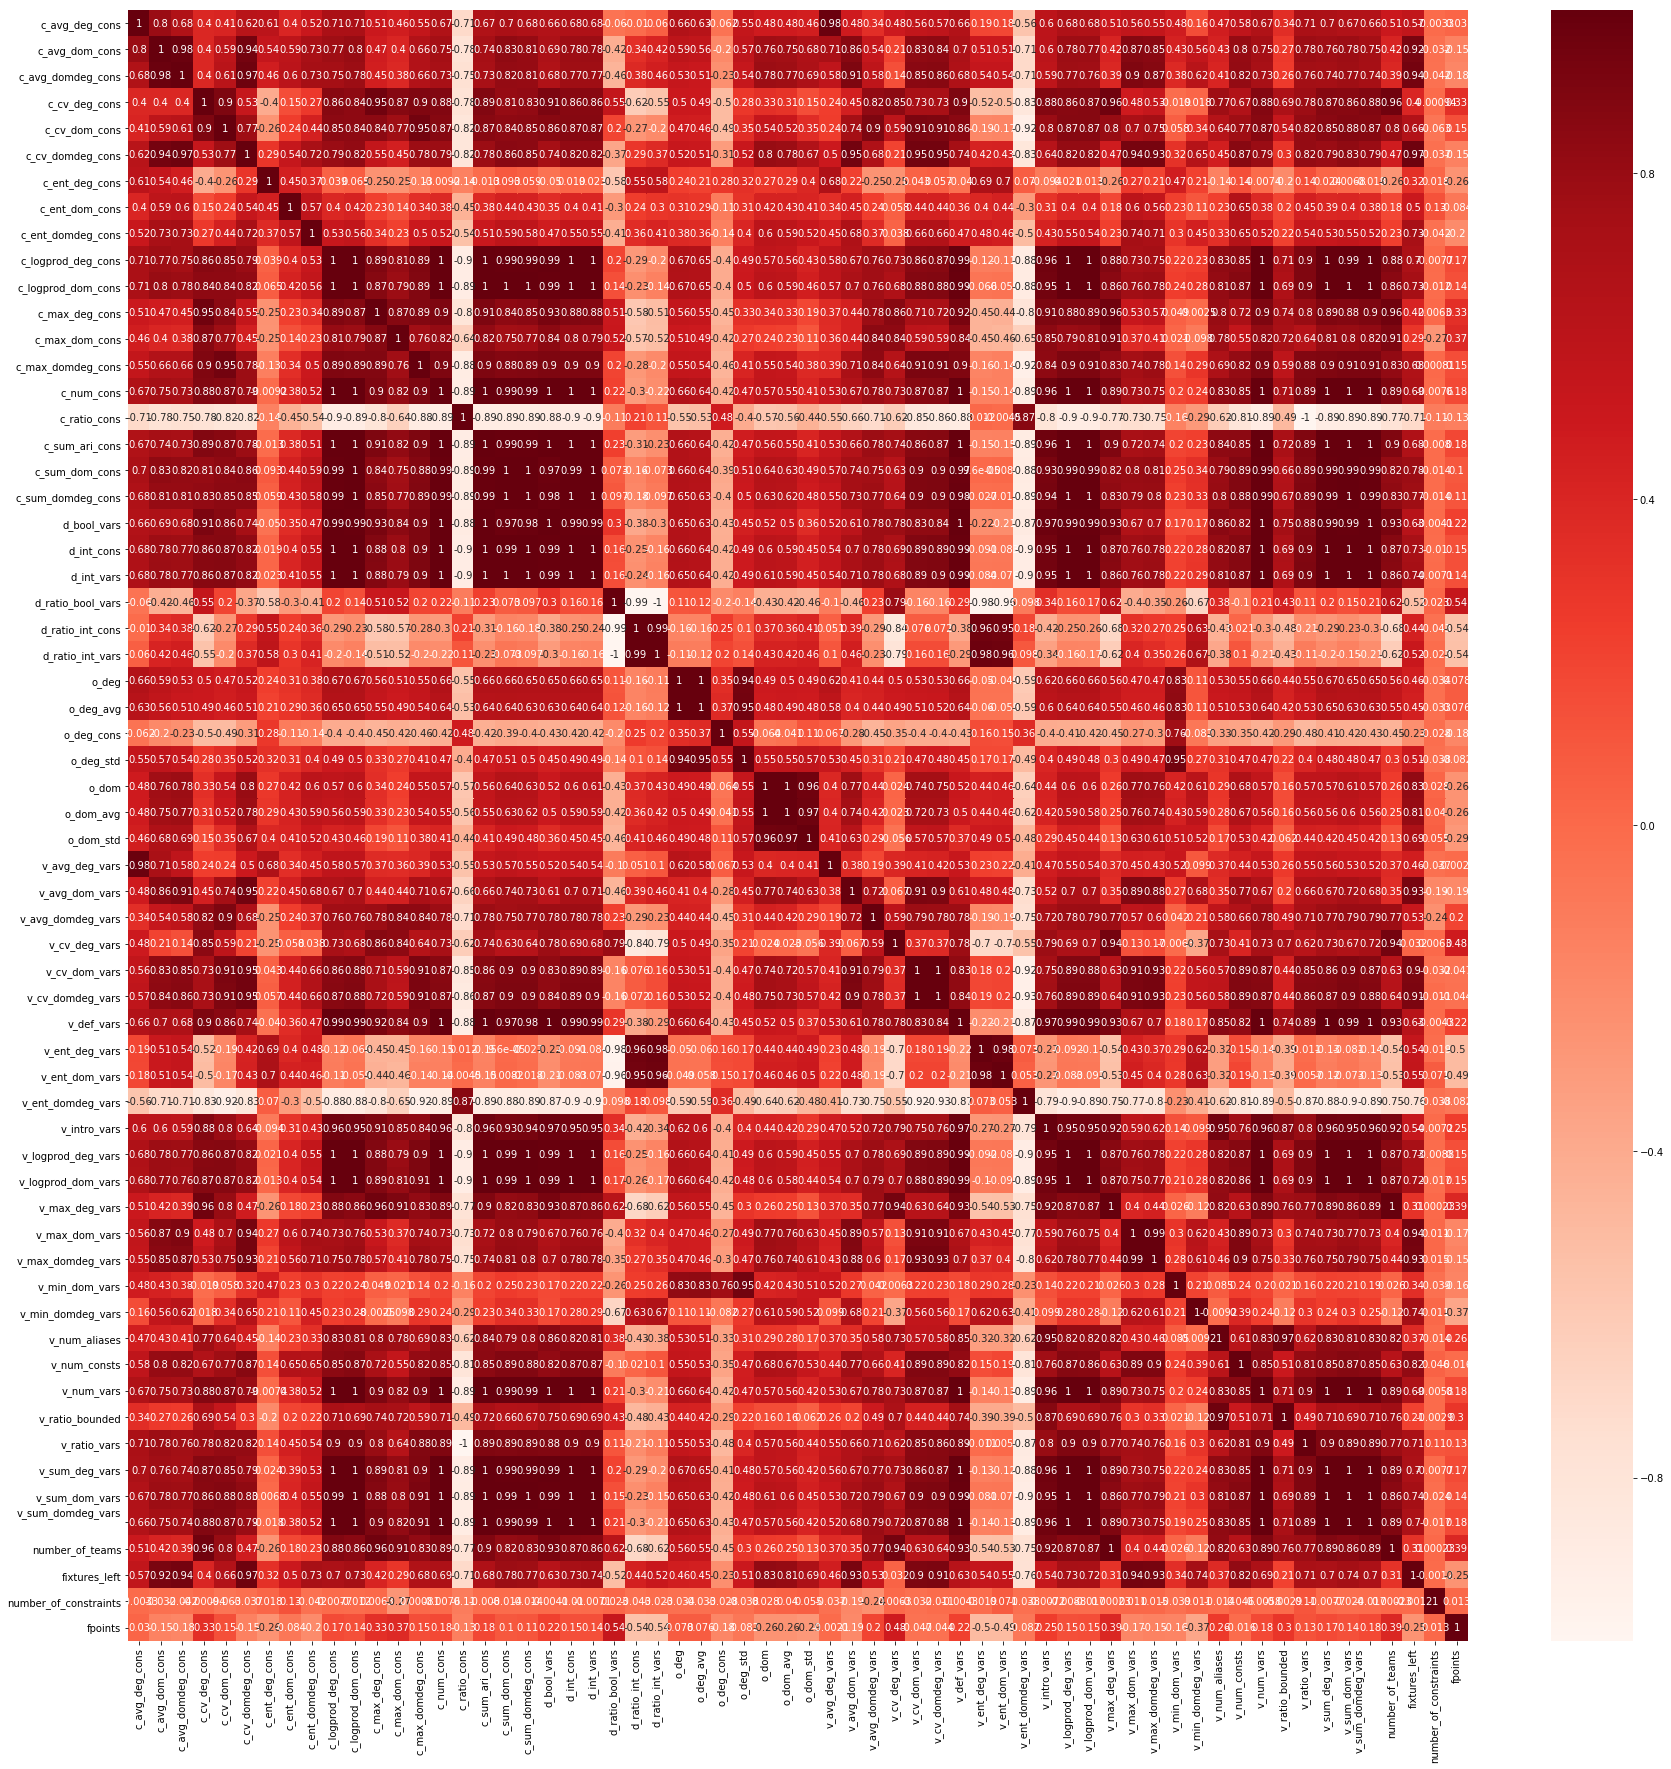

In [16]:
# split the features into sets of 5, check their correlation with output, and delete
# uncorrelated features
split_features = []
# league_numeric_features += ['result']
features_with_y = league_numeric_features
# train_df['result'] = train_y

for i in range(0, len(features_with_y), 10):
    split_features.append(features_with_y[i:i+10]+['fpoints'])

# print(split_features)
# list(df.columns)
plt.figure(figsize=(30,30))
# cor = train_df[split_features[1]].corr()
cor = train_df[league_numeric_features+['fpoints']].corr()
# print(train_df[split_features[1]].corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
lr = Pipeline([
    ('pre', ColumnTransformer([('num', FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ('est', LinearRegression())
])

In [18]:
# train_df.isnull().sum()
print([i for i in train_df.columns if train_df[i].isnull().any()])
# train_df.isna().any()

[]


In [19]:
league_dt = Pipeline([
    ('pre', ColumnTransformer([("num", FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ("estimator", DecisionTreeRegressor(max_depth=40))
])

model = league_dt.fit(train_df, train_y)

In [20]:
np.mean(cross_val_score(league_dt, test_df, test_y, scoring='neg_mean_absolute_error', cv=10))

-6.589130434782609

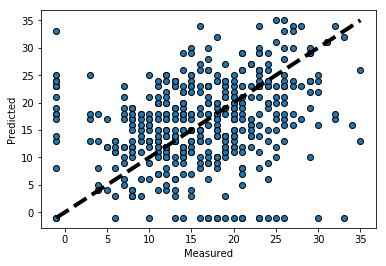

In [21]:
predicted = cross_val_predict(league_dt, test_df, test_y, cv=10)

fix, ax = plt.subplots()
ax.scatter(test_y, predicted, edgecolors=(0,0,0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## np.mean(cross_val_score(league_dt, test_df, test_y, scoring='mean_squared_error', cv=10))

In [22]:
np.mean(cross_val_score(league_dt, test_df, test_y, scoring='r2', cv=10))

-0.5018174071859222

In [23]:
from sklearn import metrics

In [24]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [25]:
predicted = cross_val_predict(league_dt, test_df, test_y, cv=10)

np.corrcoef(predicted, test_y)

array([[1.        , 0.27977997],
       [0.27977997, 1.        ]])

In [26]:
# 1 or 2 pages about the product
# numbers for the satisfiability problem
# Start writing
# finalise figures
